# Assignment 2

* Student Name: Ko Ko Win
* Student ID: 31842305
* Tutorial Code: 05
* Tutor: Mei Sin Lee 

# Part A (1) : 
Importing libraries 

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import silhouette_samples 
from sklearn.datasets import make_blobs 
from pylab import rcParams 
import random
%matplotlib inline 

In [113]:
df = pd.read_csv('CityPairs.csv') 
df

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,31048,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,31048,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,31048,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,31048,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,31048,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72967,42491,Sydney,Vancouver,Canada,4903,266.730,16.559,7235,69.625,13.946,12138,336.355,30.505,2016,5
72968,42491,Sydney,Wellington,New Zealand,11195,16.219,0.266,10944,21.179,0.026,22139,37.398,0.292,2016,5
72969,42491,Sydney,Xiamen,China,1305,70.083,5.882,1223,85.279,0.000,2528,155.362,5.882,2016,5
72970,42491,Sydney,Zhengzhou,China,0,10.593,0.000,0,71.223,0.000,0,81.816,0.000,2016,5


In [114]:
capital_ports = df.loc[:,['AustralianPort', 'Mail_In_(tonnes)', 'Mail_Out_(tonnes)','ForeignPort']] 
capital_ports

,AustralianPort,Mail_In_(tonnes),Mail_Out_(tonnes),ForeignPort
0,Adelaide,0.311,0.924,Auckland
1,Adelaide,0.000,0.000,Bahrain
2,Adelaide,0.000,0.000,Bombay
3,Adelaide,0.000,0.248,Frankfurt
4,Adelaide,0.000,2.487,London
...,...,...,...,...
72967,Sydney,16.559,13.946,Vancouver
72968,Sydney,0.266,0.026,Wellington
72969,Sydney,5.882,0.000,Xiamen
72970,Sydney,0.000,0.000,Zhengzhou


In [115]:
drop_ports = capital_ports[(capital_ports['AustralianPort'] == 'Cairns') | (capital_ports['AustralianPort'] == 'Norfolk Island') | (capital_ports['AustralianPort'] == 'Port Hedland') | (capital_ports['AustralianPort'] == 'Gold Coast/Coolangatta')| (capital_ports['AustralianPort'] == 'Townsville') | (capital_ports['AustralianPort'] == 'Gold Coast')| (capital_ports['AustralianPort'] == 'Broome') | (capital_ports['AustralianPort'] == 'Canberra') | (capital_ports['AustralianPort'] == 'Christmas Island') | (capital_ports['AustralianPort'] == 'Newcastle') | (capital_ports['AustralianPort'] == 'Sunshine Coast')].index

In [116]:
capital_ports.drop(drop_ports, inplace = True) 
capital_ports

,AustralianPort,Mail_In_(tonnes),Mail_Out_(tonnes),ForeignPort
0,Adelaide,0.311,0.924,Auckland
1,Adelaide,0.000,0.000,Bahrain
2,Adelaide,0.000,0.000,Bombay
3,Adelaide,0.000,0.248,Frankfurt
4,Adelaide,0.000,2.487,London
...,...,...,...,...
72966,Sydney,0.000,0.000,Toronto
72967,Sydney,16.559,13.946,Vancouver
72968,Sydney,0.266,0.026,Wellington
72969,Sydney,5.882,0.000,Xiamen


In [117]:
capital_ports

,AustralianPort,Mail_In_(tonnes),Mail_Out_(tonnes),ForeignPort
0,Adelaide,0.311,0.924,Auckland
1,Adelaide,0.000,0.000,Bahrain
2,Adelaide,0.000,0.000,Bombay
3,Adelaide,0.000,0.248,Frankfurt
4,Adelaide,0.000,2.487,London
...,...,...,...,...
72966,Sydney,0.000,0.000,Toronto
72967,Sydney,16.559,13.946,Vancouver
72968,Sydney,0.266,0.026,Wellington
72969,Sydney,5.882,0.000,Xiamen


In [118]:
capital_ports = capital_ports.rename(columns={'Mail_In_(tonnes)':'mail_in', 'Mail_Out_(tonnes)' : 'mail_out' }) 
capital_ports

,AustralianPort,mail_in,mail_out,ForeignPort
0,Adelaide,0.311,0.924,Auckland
1,Adelaide,0.000,0.000,Bahrain
2,Adelaide,0.000,0.000,Bombay
3,Adelaide,0.000,0.248,Frankfurt
4,Adelaide,0.000,2.487,London
...,...,...,...,...
72966,Sydney,0.000,0.000,Toronto
72967,Sydney,16.559,13.946,Vancouver
72968,Sydney,0.266,0.026,Wellington
72969,Sydney,5.882,0.000,Xiamen


#### Calculation for total mail in 

In [119]:
a = pd.DataFrame(capital_ports.groupby('AustralianPort').mail_in.sum().reset_index()) 
a = a.rename(columns = {'AustralianPort' : 'CapitalPorts'})
a

,CapitalPorts,mail_in
0,Adelaide,3151.792
1,Brisbane,38971.895
2,Darwin,401.673
3,Hobart,5.681
4,Melbourne,128609.327
5,Perth,20788.444
6,Sydney,312534.165


#### Calculation for total mail out 

In [120]:
b = pd.DataFrame(capital_ports.groupby('AustralianPort').mail_out.sum().reset_index()) 
b = b.rename(columns = {'AustralianPort' : 'CapitalPorts'})
b

,CapitalPorts,mail_out
0,Adelaide,3577.532
1,Brisbane,37698.235
2,Darwin,589.191
3,Hobart,0.293
4,Melbourne,70646.588
5,Perth,17177.825
6,Sydney,177177.967


In [121]:
data = {  
    'Capital Ports' : ['Adelaide', 'Brisbane','Darwin', 'Hobart', 'Melbourne', 'Perth', 'Sydney'], 
    'Total Mail In' : [3151.792, 38971.895, 401.673,5.681, 128609.327, 20788.444, 312534.165    ], 
    'Total Mail Out' : [3577.532, 37698.235, 589.191, 0.293, 70646.588, 17177.825, 177177.967 ], 
} 

data = pd.DataFrame(data)
data 

,Capital Ports,Total Mail In,Total Mail Out
0,Adelaide,3151.792,3577.532
1,Brisbane,38971.895,37698.235
2,Darwin,401.673,589.191
3,Hobart,5.681,0.293
4,Melbourne,128609.327,70646.588
5,Perth,20788.444,17177.825
6,Sydney,312534.165,177177.967


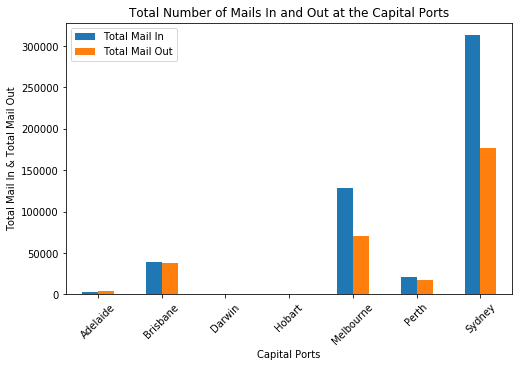

In [122]:
ax=data.plot.bar(figsize=(8,5)) 
ax.set_xticklabels(data['Capital Ports'],rotation=45) 
plt.xlabel('Capital Ports') 
plt.ylabel('Total Mail In & Total Mail Out')  
plt.title('Total Number of Mails In and Out at the Capital Ports')
plt.show() 

# Answer 

1.1) Sydney has highest number of mail flowing in. 

1.2) No, as we can see from our dataframe 'data' values for Total Mail In and Total Mail Out for Hobart and Darwin are significantly small compare to other 5 cities therefore comparasion cannot be made by looking at the plot. 

1.3) Populations of Sydney, Melbourne and Brisbane are 5,029,768 , 4,725,316 , 2,360,241 respectively. On the other hand, populations of Darwin, Hobart and Adelaide are 145,916 , 224,462 , 1,324,279. As we can see Sydney, Melbourne and Brisbane have more mail traffic flow than Darwin, Hobart and Adelaide because of its larger population density. Therefore, it requires more mails to go out and come in.  

<b>REFERENCE</b>: https://en.wikipedia.org/wiki/List_of_Australian_capital_cities 

# Part A (2) 

In [123]:
df

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,31048,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,31048,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,31048,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,31048,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,31048,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72967,42491,Sydney,Vancouver,Canada,4903,266.730,16.559,7235,69.625,13.946,12138,336.355,30.505,2016,5
72968,42491,Sydney,Wellington,New Zealand,11195,16.219,0.266,10944,21.179,0.026,22139,37.398,0.292,2016,5
72969,42491,Sydney,Xiamen,China,1305,70.083,5.882,1223,85.279,0.000,2528,155.362,5.882,2016,5
72970,42491,Sydney,Zhengzhou,China,0,10.593,0.000,0,71.223,0.000,0,81.816,0.000,2016,5


In [124]:
linechart_df = df.loc[:,['AustralianPort', 'Mail_Total_(tonnes)', 'Year']] 
linechart_df 

,AustralianPort,Mail_Total_(tonnes),Year
0,Adelaide,1.235,1985
1,Adelaide,0.000,1985
2,Adelaide,0.000,1985
3,Adelaide,0.248,1985
4,Adelaide,2.487,1985
...,...,...,...
72967,Sydney,30.505,2016
72968,Sydney,0.292,2016
72969,Sydney,5.882,2016
72970,Sydney,0.000,2016


#### Perth linechart 

In [125]:
new_perth = linechart_df[linechart_df.AustralianPort == 'Perth'] 
new_perth = new_perth.rename(columns = {'Mail_Total_(tonnes)' : 'total_mail'}) 
new_perth

,AustralianPort,total_mail,Year
90,Perth,0.000,1985
91,Perth,0.000,1985
92,Perth,0.117,1985
93,Perth,0.194,1985
94,Perth,0.044,1985
...,...,...,...
72913,Perth,0.000,2016
72914,Perth,0.000,2016
72915,Perth,0.670,2016
72916,Perth,0.566,2016


In [126]:
perth_sum = pd.DataFrame(new_perth.groupby('Year').total_mail.sum())   
perth_sum

,total_mail
Year,
1985,171.461
1986,224.049
1987,277.874
1988,545.534
1989,790.565
1990,887.316
1991,877.064
1992,871.340
1993,998.510


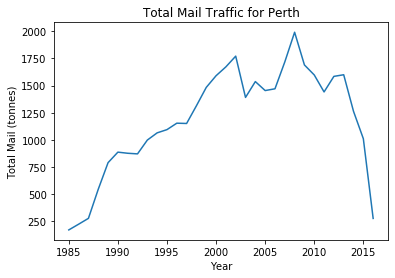

In [127]:
plt.plot(perth_sum) 
plt.title('Total Mail Traffic for Perth') 
plt.xlabel('Year') 
plt.ylabel('Total Mail (tonnes)')
plt.show()

#### Brisbane linechart 

In [128]:
new_brisbane= linechart_df[linechart_df.AustralianPort == 'Brisbane']   
new_brisbane = new_brisbane.rename(columns = {'Mail_Total_(tonnes)' : 'total_mail'}) 
new_brisbane

,AustralianPort,total_mail,Year
8,Brisbane,0.000,1985
9,Brisbane,3.889,1985
10,Brisbane,0.000,1985
11,Brisbane,0.000,1985
12,Brisbane,0.083,1985
...,...,...,...
72844,Brisbane,16.522,2016
72845,Brisbane,52.102,2016
72846,Brisbane,5.180,2016
72847,Brisbane,14.665,2016


In [129]:
brisbane_sum = pd.DataFrame(new_brisbane.groupby('Year').total_mail.sum())   
brisbane_sum

,total_mail
Year,
1985,232.588
1986,303.250
1987,402.029
1988,756.031
1989,1052.270
1990,1213.883
1991,1236.324
1992,1440.426
1993,1678.700


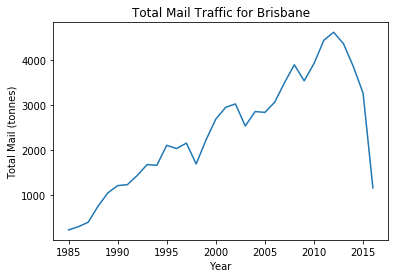

In [130]:
plt.plot(brisbane_sum) 
plt.title('Total Mail Traffic for Brisbane') 
plt.xlabel('Year') 
plt.ylabel('Total Mail (tonnes)')
plt.show()

In [131]:
new_perth.describe()

,total_mail,Year
count,8124.000000,8124.000000
mean,4.673347,1998.477228
std,13.186102,8.431216
min,0.000000,1985.000000
25%,0.000000,1992.000000
50%,0.238000,1998.000000
75%,2.450500,2004.000000
max,194.097000,2016.000000


In [132]:
new_brisbane.describe()

,total_mail,Year
count,12046.000000,12046.000000
mean,6.364779,1999.748962
std,16.177443,8.679606
min,0.000000,1985.000000
25%,0.000000,1993.000000
50%,0.099000,1999.000000
75%,2.887000,2007.000000
max,183.926000,2016.000000


2.1)  As we can see from the trend, the Total Mail Traffic for both Perth and Brisbane started to increase in the mid-80s 

2.2) For both Perth and Brisbane the maximum amount of total mail traffic flow was recorded in the year 2016. For perth it was 194.097 tonnes and for brisbane it was 183.926 tonnes. 

# PART B1 (Q1) 

In [133]:
df

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,31048,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,31048,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,31048,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,31048,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,31048,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72967,42491,Sydney,Vancouver,Canada,4903,266.730,16.559,7235,69.625,13.946,12138,336.355,30.505,2016,5
72968,42491,Sydney,Wellington,New Zealand,11195,16.219,0.266,10944,21.179,0.026,22139,37.398,0.292,2016,5
72969,42491,Sydney,Xiamen,China,1305,70.083,5.882,1223,85.279,0.000,2528,155.362,5.882,2016,5
72970,42491,Sydney,Zhengzhou,China,0,10.593,0.000,0,71.223,0.000,0,81.816,0.000,2016,5


In [134]:
scatter_df = df.loc[:,['AustralianPort','Freight_Total_(tonnes)', 'Year']] 
scatter_df = scatter_df.rename(columns= {'Freight_Total_(tonnes)': 'total_freight'})
scatter_df

,AustralianPort,total_freight,Year
0,Adelaide,60.871,1985
1,Adelaide,0.033,1985
2,Adelaide,0.000,1985
3,Adelaide,0.009,1985
4,Adelaide,13.418,1985
...,...,...,...
72967,Sydney,336.355,2016
72968,Sydney,37.398,2016
72969,Sydney,155.362,2016
72970,Sydney,81.816,2016


In [135]:
drop_ports = scatter_df[(scatter_df['AustralianPort'] == 'Cairns') | (scatter_df['AustralianPort'] == 'Norfolk Island') | (scatter_df['AustralianPort'] == 'Port Hedland') | (scatter_df['AustralianPort'] == 'Gold Coast/Coolangatta')| (scatter_df['AustralianPort'] == 'Townsville') | (scatter_df['AustralianPort'] == 'Gold Coast')| (scatter_df['AustralianPort'] == 'Broome') | (scatter_df['AustralianPort'] == 'Canberra') | (scatter_df['AustralianPort'] == 'Christmas Island') | (scatter_df['AustralianPort'] == 'Newcastle') | (scatter_df['AustralianPort'] == 'Sunshine Coast')].index 
scatter_df.drop(drop_ports, inplace = True) 
scatter_df

,AustralianPort,total_freight,Year
0,Adelaide,60.871,1985
1,Adelaide,0.033,1985
2,Adelaide,0.000,1985
3,Adelaide,0.009,1985
4,Adelaide,13.418,1985
...,...,...,...
72966,Sydney,0.000,2016
72967,Sydney,336.355,2016
72968,Sydney,37.398,2016
72969,Sydney,155.362,2016


In [136]:
annual_sum = pd.DataFrame(scatter_df.groupby('Year').total_freight.sum().reset_index()) 
annual_sum 

,Year,total_freight
0,1985,230272.052
1,1986,247340.715
2,1987,286028.176
3,1988,306648.315
4,1989,345092.750
5,1990,353819.416
6,1991,355787.156
7,1992,399034.576
8,1993,446893.851
9,1994,508794.106


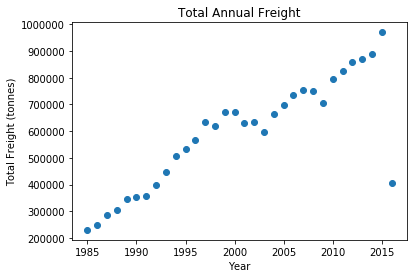

In [137]:
plt.scatter(annual_sum.Year, annual_sum.total_freight) 
plt.title('Total Annual Freight') 
plt.xlabel('Year') 
plt.ylabel('Total Freight (tonnes)')
plt.show()

1) Pattern shows the clear pattern and I observe that total freight increase from year 1985 onwards and it started to 
decrease from year 2000 to 2004. Generally, the trend shows that as number of years increase amount of total freight incerease.

# Q2) 

In [138]:
annual_sum.describe() 

,Year,total_freight
count,32.000000,32.000000
mean,2000.500000,592518.789969
std,9.380832,204506.840733
min,1985.000000,230272.052000
25%,1992.750000,403832.119000
50%,2000.500000,632138.236000
75%,2008.250000,739975.605000
max,2016.000000,970265.749000


In [139]:
Q1 = annual_sum.total_freight.quantile(0.25) 
Q3 = annual_sum.total_freight.quantile(0.75) 
Q1, Q3 

(403832.1189999997, 739975.605)

In [140]:
IQR = Q3 - Q1
IQR 

336143.48600000027

In [141]:
lower_limit = Q1 - 1.5*IQR 
upper_limit = Q3 + 1.5*IQR 
lower_limit, upper_limit

(-100383.11000000068, 1244190.8340000003)

In [142]:
annual_sum[(annual_sum.total_freight<lower_limit) | (annual_sum.total_freight>upper_limit)]  

,Year,total_freight


2.2) After using the IQR rule we can see that there is no outlier. 

# Q3) 

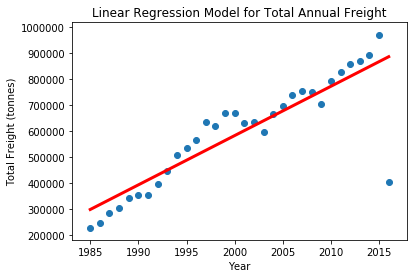

In [143]:
slope, intercept, r_value, p_value, std_err = linregress(annual_sum['Year'], annual_sum['total_freight']) 

line = [slope*xi + intercept for xi in annual_sum['Year']] 

plt.plot(annual_sum['Year'],line,'r-', linewidth=3) 

plt.scatter(annual_sum['Year'], annual_sum['total_freight']) 
plt.title('Linear Regression Model for Total Annual Freight') 
plt.xlabel('Year') 
plt.ylabel('Total Freight (tonnes)')
plt.show() 

In [144]:
print(slope, intercept, r_value, p_value, std_err)

18894.492339992663 -37205913.13618657 0.8666998553936881 1.4324411666853876e-10 1985.447617420842


#### ANS: Yes i think its a good fit because if our R-value is between 0.8 to 1 it is always a pretty good fit and in our case our R-value is 0.867 (3 d.p).Therefore, we can conclude that it is a good fit.  

#### 4) 

In [145]:
rate_of_change = annual_sum.pct_change() 
rate_of_change

,Year,total_freight
0,NaN,NaN
1,0.000504,0.074124
2,0.000504,0.156414
3,0.000503,0.072091
4,0.000503,0.125370
5,0.000503,0.025288
6,0.000503,0.005561
7,0.000502,0.121554
8,0.000502,0.119938
9,0.000502,0.138512


In [146]:
rate_of_change['total_freight'].mean()

0.030400087574779328

#### Total amount of freight is increasing at 0.0304 each year. 

####  Question 5)  

In [147]:
X = annual_sum.iloc[:, 0:1].values 
y = annual_sum.iloc[:, 1].values 

In [148]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0) 

In [149]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
# Predicting the test set results
y_pred = model.predict(X_test) 

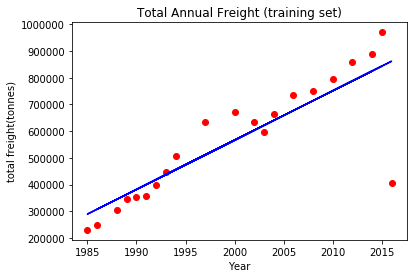

In [151]:
plt.scatter(X_train, y_train, color='red') 
plt.plot(X_train, model.predict(X_train), color='blue') 
plt.title('Total Annual Freight (training set)')
plt.xlabel('Year') 
plt.ylabel('total freight(tonnes)') 
plt.show()

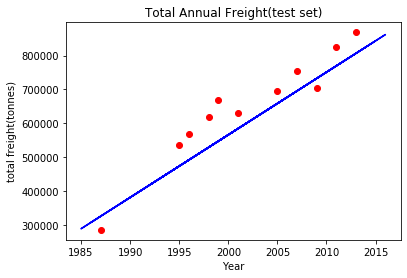

In [152]:
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, model.predict(X_train), color='blue') 
plt.title('Total Annual Freight(test set)')  
plt.xlabel('Year') 
plt.ylabel('total freight(tonnes)')  
plt.show()

####  linear model predicting the total freight volume at Australian state capital port at 2020

In [153]:
model.predict([[2020]])

array([935641.4647256])

#### total freight volume predicited at 2020 : 935641.464 tonnes

#### Question 6) 

In [154]:
test = annual_sum[annual_sum.Year > 2004] 
test

,Year,total_freight
20,2005,696756.521
21,2006,737146.061
22,2007,754057.606
23,2008,748464.237
24,2009,704530.841
25,2010,793829.451
26,2011,826486.658
27,2012,858478.438
28,2013,868592.996
29,2014,890479.364


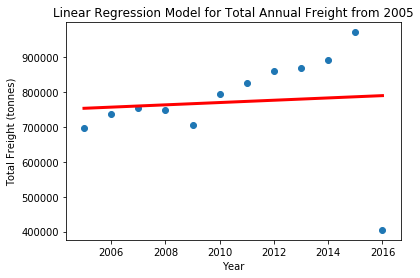

In [155]:
slope, intercept, r_value, p_value, std_err = linregress(test['Year'], test['total_freight']) 

line = [slope*xi + intercept for xi in test['Year']] 

plt.plot(test['Year'],line,'r-', linewidth=3) 

plt.scatter(test['Year'], test['total_freight']) 
plt.title('Linear Regression Model for Total Annual Freight from 2005') 
plt.xlabel('Year') 
plt.ylabel('Total Freight (tonnes)')
plt.show() 

In [156]:
X2 = test.iloc[:, 0:1].values 
y2 = test.iloc[:, 1].values 

In [157]:
from sklearn.model_selection import train_test_split 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 1/3, random_state = 0) 

In [158]:
model = LinearRegression() 
model.fit(X2_train, y2_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

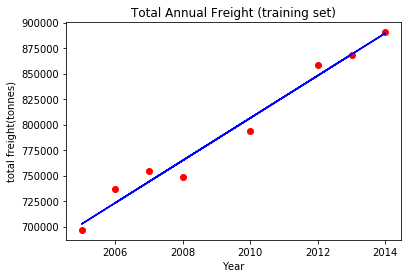

In [159]:
plt.scatter(X2_train, y2_train, color='red') 
plt.plot(X2_train, model.predict(X2_train), color='blue') 
plt.title('Total Annual Freight (training set)')
plt.xlabel('Year') 
plt.ylabel('total freight(tonnes)') 
plt.show()

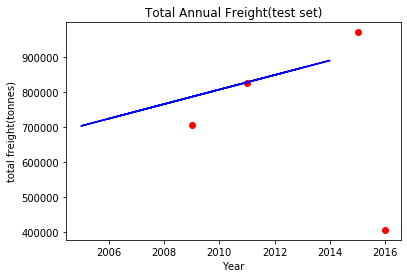

In [160]:
plt.scatter(X2_test, y2_test, color='red') 
plt.plot(X2_train, model.predict(X2_train), color='blue') 
plt.title('Total Annual Freight(test set)')  
plt.xlabel('Year') 
plt.ylabel('total freight(tonnes)')  
plt.show()

In [161]:
model.predict([[2020]])

array([1014364.25955712])

#### ANS: From 2005 onwards linear model predicted total freight to be 1014364.259  and we can see that prediction for 2020 increases. In my opinion, we can trsut the prediction from question 5 beacuase it has more data compare to our current predictiion. Therefore, we can get a better prediction. 

# PART B2 

In [162]:
df

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,31048,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,31048,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,31048,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,31048,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,31048,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72967,42491,Sydney,Vancouver,Canada,4903,266.730,16.559,7235,69.625,13.946,12138,336.355,30.505,2016,5
72968,42491,Sydney,Wellington,New Zealand,11195,16.219,0.266,10944,21.179,0.026,22139,37.398,0.292,2016,5
72969,42491,Sydney,Xiamen,China,1305,70.083,5.882,1223,85.279,0.000,2528,155.362,5.882,2016,5
72970,42491,Sydney,Zhengzhou,China,0,10.593,0.000,0,71.223,0.000,0,81.816,0.000,2016,5


In [163]:
traffic_volume = df.loc[:,['AustralianPort','Year', 'Passengers_In', 'Passengers_Out', 'Month']] 
traffic_volume

,AustralianPort,Year,Passengers_In,Passengers_Out,Month
0,Adelaide,1985,1513,985,31048
1,Adelaide,1985,12,5,31048
2,Adelaide,1985,7,5,31048
3,Adelaide,1985,115,171,31048
4,Adelaide,1985,1567,1472,31048
...,...,...,...,...,...
72967,Sydney,2016,4903,7235,42491
72968,Sydney,2016,11195,10944,42491
72969,Sydney,2016,1305,1223,42491
72970,Sydney,2016,0,0,42491


In [164]:
sum_PI = pd.DataFrame(traffic_volume.groupby('Month').Passengers_In.sum().reset_index()) 
sum_PI

,Month,Passengers_In
0,31048,263795
1,31079,204953
2,31107,209513
3,31138,182673
4,31168,198902
...,...,...
372,42370,1918279
373,42401,1560692
374,42430,1470519
375,42461,1481204


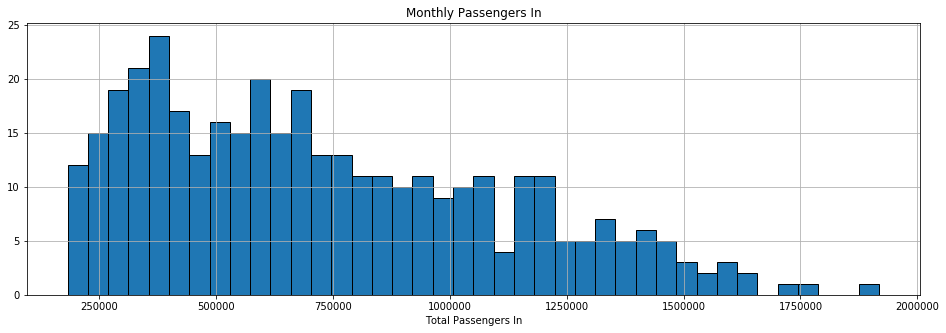

In [165]:
rcParams['figure.figsize'] = 16,5 
sum_PI.Passengers_In.hist(bins = 40, edgecolor = 'black')
plt.title('Monthly Passengers In') 
plt.xlabel('Total Passengers In')
plt.show()

In [166]:
sum_PO = pd.DataFrame(traffic_volume.groupby('Month').Passengers_Out.sum().reset_index()) 
sum_PO

,Month,Passengers_Out
0,31048,208770
1,31079,179222
2,31107,231582
3,31138,214403
4,31168,224350
...,...,...
372,42370,1642059
373,42401,1375060
374,42430,1538491
375,42461,1478169


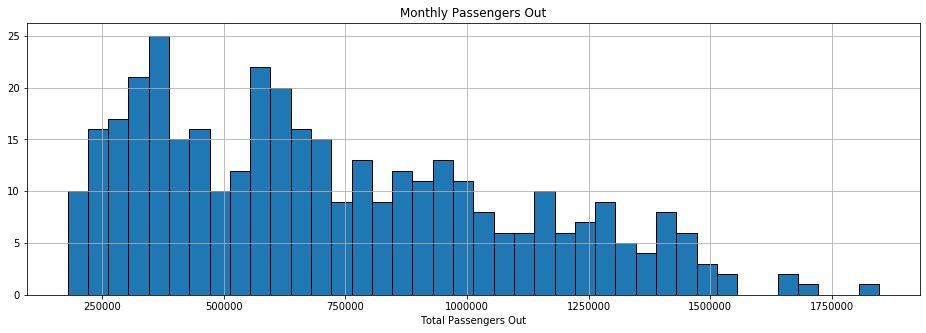

In [167]:
rcParams['figure.figsize'] = 16,5 
sum_PO.Passengers_Out.hist(bins = 40, edgecolor = 'black') 
plt.title('Monthly Passengers Out') 
plt.xlabel('Total Passengers Out')
plt.show()

#### ANS : For Monthly Passengers In the distribution is skewed to the right because as we can see the slope of the histogram decreases to the right and this is also known as unimodal data. For Montly Passengers Out there are 2 modes so the distribution for it will be bimodal. 

####         :  There is an outlier for Monthly Passengers In at the far right side between 1750000 and 2000000. There is also an outlier        for Monthly Passengers Out at the far right side as well at over 1750000.  


##### 2) 

Boxplot for monthly passengers in 

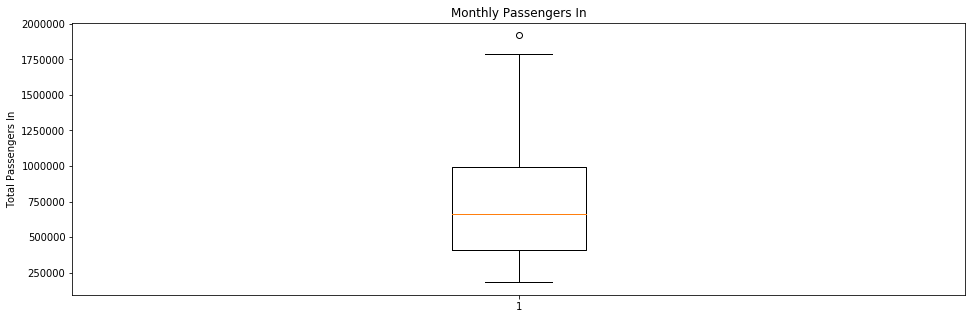

In [168]:
plt.boxplot(sum_PI.Passengers_In)
plt.title('Monthly Passengers In') 
plt.ylabel('Total Passengers In')
plt.show()

Boxplot for monthly passengers out

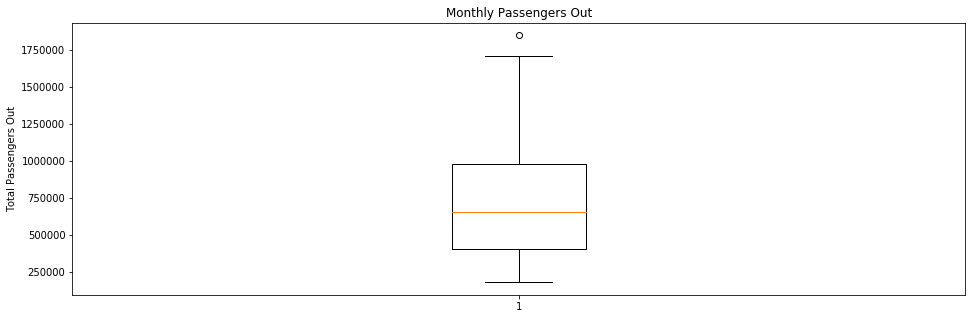

In [169]:
plt.boxplot(sum_PO.Passengers_Out)
plt.title('Monthly Passengers Out') 
plt.ylabel('Total Passengers Out')
plt.show()

#### ANS: The little circle on the boxplot represents the outlier. Therefore, we can see that there is one outlier for each of the boxplot. 

IQR rule to find outlier data

In [170]:
sum_PI.describe()

,Month,Passengers_In
count,377.000000,3.770000e+02
mean,36769.169761,7.317297e+05
std,3316.906490,3.759759e+05
min,31048.000000,1.826730e+05
25%,33909.000000,4.079340e+05
50%,36770.000000,6.662590e+05
75%,39630.000000,9.944660e+05
max,42491.000000,1.918279e+06


In [171]:
lower_q = sum_PI.Passengers_In.quantile(0.25) 
upper_q = sum_PI.Passengers_In.quantile(0.75) 
lower_q, upper_q

(407934.0, 994466.0)

In [172]:
iqr = upper_q - lower_q 
iqr 

586532.0

In [173]:
lowerlimit = lower_q - 1.5*iqr 
upperlimit = upper_q + 1.5*iqr 
lowerlimit, upperlimit 

(-471864.0, 1874264.0)

##### Outlier datapoint for Monthly Passengers In 

In [174]:
sum_PI[(sum_PI.Passengers_In < lowerlimit) | (sum_PI.Passengers_In > upperlimit) ] 

,Month,Passengers_In
372,42370,1918279


In [175]:
sum_PO.describe()

,Month,Passengers_Out
count,377.000000,3.770000e+02
mean,36769.169761,7.210568e+05
std,3316.906490,3.673378e+05
min,31048.000000,1.783190e+05
25%,33909.000000,4.037060e+05
50%,36770.000000,6.561840e+05
75%,39630.000000,9.759200e+05
max,42491.000000,1.847744e+06


In [176]:
lower_q2 = sum_PO.Passengers_Out.quantile(0.25) 
upper_q2 = sum_PO.Passengers_Out.quantile(0.75) 
lower_q2, upper_q2

(403706.0, 975920.0)

In [177]:
iqr2 = upper_q2 - lower_q2
iqr2 

572214.0

In [178]:
lowerlimit2 = lower_q2 - 1.5*iqr2 
upperlimit2 = upper_q2 + 1.5*iqr2 
lowerlimit2, upperlimit2 

(-454615.0, 1834241.0)

##### Outlier datapoint for Monthly Passengers Out  

In [179]:
sum_PO[(sum_PO.Passengers_Out < lowerlimit2) | (sum_PO.Passengers_Out > upperlimit2) ] 

,Month,Passengers_Out
371,42339,1847744


##### 3) 

In [180]:
sum_PI.describe()

,Month,Passengers_In
count,377.000000,3.770000e+02
mean,36769.169761,7.317297e+05
std,3316.906490,3.759759e+05
min,31048.000000,1.826730e+05
25%,33909.000000,4.079340e+05
50%,36770.000000,6.662590e+05
75%,39630.000000,9.944660e+05
max,42491.000000,1.918279e+06


In [181]:
sum_PO.describe()

,Month,Passengers_Out
count,377.000000,3.770000e+02
mean,36769.169761,7.210568e+05
std,3316.906490,3.673378e+05
min,31048.000000,1.783190e+05
25%,33909.000000,4.037060e+05
50%,36770.000000,6.561840e+05
75%,39630.000000,9.759200e+05
max,42491.000000,1.847744e+06


#### Differences: Firstly in the boxplot we can identify the outlier where else in the describe function we cannot find the outlier. Secondly, in the describe function we can get the count, mean and standard devaition where else in box plot we cannot get those information. 

#### Similarities: We can get the maximum and minimum number of passengers in and passenger out in both describe function and boxplot. We can also get the median, upper quartile and lower quartile in both describe function and boxplot. 

# PART C 

In [182]:
df2 = pd.read_csv('ClusteringData.csv') 
df2

,GDP per Capita,Suicide Rate
0,1.44178,0.44453
1,1.52733,0.41203
2,1.42666,0.14975
3,1.57744,0.35776
4,1.40598,0.41004
...,...,...
152,0.39499,0.06681
153,0.38227,0.07112
154,0.28123,0.11587
155,0.74719,0.17233


In [183]:
df2.shape

(157, 2)

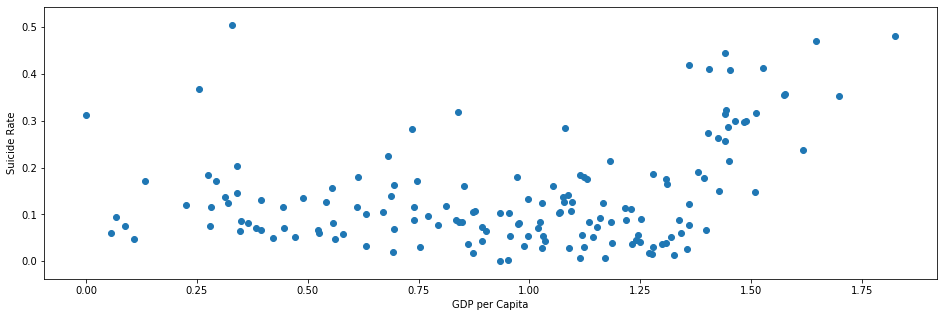

In [184]:
#Vizualize the data 
plt.scatter(df2['GDP per Capita'], df2['Suicide Rate']) 
plt.xlabel('GDP per Capita') 
plt.ylabel('Suicide Rate') 
plt.show()

#### When k=2 

In [185]:
kmeans = KMeans(n_clusters=2).fit(df2[['GDP per Capita','Suicide Rate']]) 

In [186]:
kmeans.cluster_centers_

array([[0.50547186, 0.12426153],
       [1.22383969, 0.14566837]])

In [187]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

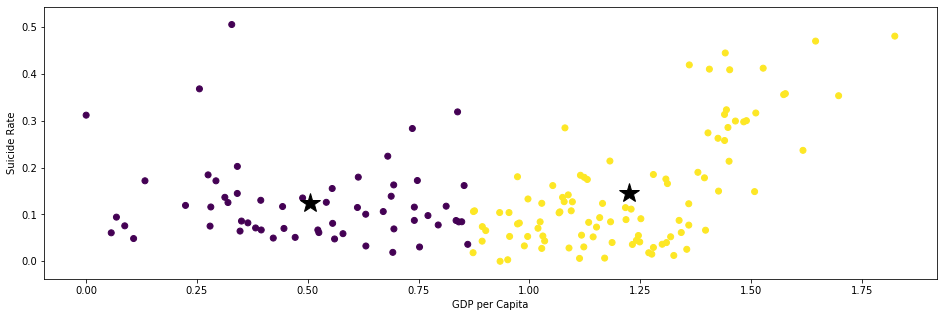

In [188]:
# Visualise the output labels
plt.scatter(x=df2['GDP per Capita'],y=df2['Suicide Rate'], c=kmeans.labels_)

# Visualise the cluster centers (black stars)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'k*',markersize=20)
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate')
plt.show()

#### When k=4 

In [189]:
kmeans2 = KMeans(n_clusters=4).fit(df2[['GDP per Capita','Suicide Rate']])  

In [190]:
kmeans2.cluster_centers_ 

array([[1.18474764, 0.08870709],
       [0.34425857, 0.12658514],
       [0.82236049, 0.10097659],
       [1.49354538, 0.31375077]])

In [191]:
kmeans2.labels_ 

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3,
       3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 2, 0, 3, 3, 0, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 3, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 3, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1,
       1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1])

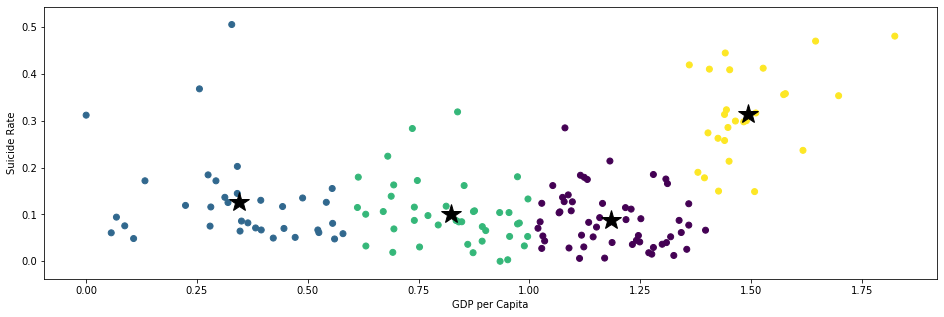

In [192]:
# Visualise the output labels
plt.scatter(x=df2['GDP per Capita'],y=df2['Suicide Rate'], c=kmeans2.labels_)

# Visualise the cluster centers (black stars)
plt.plot(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],'k*',markersize=20)
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate')
plt.show()

#### When k=3

In [193]:
kmeans3 = KMeans(n_clusters=3).fit(df2[['GDP per Capita','Suicide Rate']])  

In [194]:
kmeans3.cluster_centers_

array([[0.9581594 , 0.09887403],
       [1.39266098, 0.19852078],
       [0.37273692, 0.12455923]])

In [195]:
kmeans3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2])

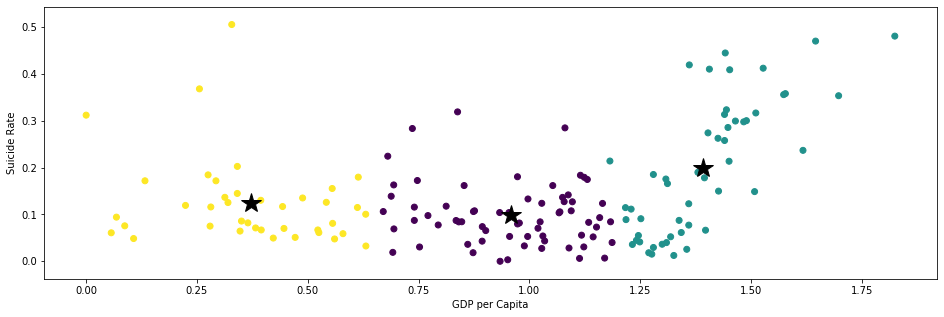

In [196]:
plt.scatter(x=df2['GDP per Capita'],y=df2['Suicide Rate'], c=kmeans3.labels_)

# Visualise the cluster centers (black stars)
plt.plot(kmeans3.cluster_centers_[:,0],kmeans3.cluster_centers_[:,1],'k*',markersize=20)
plt.xlabel('GDP per Capita')
plt.ylabel('Suicide Rate')
plt.show()

#### ANS: Based on the vizualisations the best number of cluster will be 3 because we can seperate the GDP per Capita into 3 category which are country with low GDP per Capita, country with medium GDP per Capita and lastly country with high GDP per Capita.  

####        : The first cluster shows the country with low GDP per capita and we can see that suicide rate is highest for that cluster which reached 0.5 . The second cluster represent the country with medium GDP per capita and we can see that majority of suicide rate is between 0.0 and 0.2 . The last cluster represent the country with high GDP per capita and we can see that as GDP per capita increases the suicide rate increases as well . Generally, we can conclude that country with low GDP per capita has higher suicide rate

# Challenge 1 

#### (1) Silhouette score ranges from -1 to 1 where -1 means clusters are wrong, 0 means clusters are same and 1 means clusters are far away.  

1.1) Silhouette score is close to 0 therefore the clusters are same. 

1.2) Silhouette score is -0.06 which is still close to 0 therefore we can say that clusters are same. 

1.3) Silhouette score is close to 1 which means clusters are far apart from each other.

1.4) Silhouette score is -0.97 which is close to -1 and we can say that clusters are wrong. 

##### Reference: https://www.youtube.com/watch?v=Qh7VxLsaU9M&t=205s&ab_channel=Dr.VytautasBielinskas 

In [197]:
df_clustering = df2[['GDP per Capita', 'Suicide Rate']] 
df_clustering 

,GDP per Capita,Suicide Rate
0,1.44178,0.44453
1,1.52733,0.41203
2,1.42666,0.14975
3,1.57744,0.35776
4,1.40598,0.41004
...,...,...
152,0.39499,0.06681
153,0.38227,0.07112
154,0.28123,0.11587
155,0.74719,0.17233


In [198]:
X = df_clustering.iloc[:, :].values 
X

array([[1.44178, 0.44453],
       [1.52733, 0.41203],
       [1.42666, 0.14975],
       [1.57744, 0.35776],
       [1.40598, 0.41004],
       [1.44015, 0.31329],
       [1.46468, 0.29927],
       [1.36066, 0.41904],
       [1.44443, 0.32331],
       [1.45181, 0.40867],
       [1.33766, 0.08728],
       [1.45038, 0.21348],
       [1.50796, 0.14868],
       [1.06879, 0.10547],
       [1.35943, 0.12275],
       [1.44787, 0.28551],
       [1.08754, 0.14166],
       [1.42539, 0.26248],
       [1.48341, 0.29754],
       [1.69752, 0.35329],
       [1.11508, 0.18355],
       [1.64555, 0.46987],
       [1.40283, 0.27399],
       [1.2167 , 0.11451],
       [1.18306, 0.08423],
       [1.15137, 0.07296],
       [1.30915, 0.03986],
       [1.57352, 0.35561],
       [1.18157, 0.21394],
       [1.30782, 0.17554],
       [1.03032, 0.05399],
       [1.39488, 0.17808],
       [1.0893 , 0.02833],
       [1.48953, 0.30008],
       [1.39729, 0.0663 ],
       [1.82427, 0.48049],
       [1.34253, 0.06137],
 

In [199]:
lst = [] 

for i in range(1, 11): 
    new_kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42) 
    new_kmeans.fit(X) 
    
    lst.append(new_kmeans.inertia_)

In [200]:
silhouette_score(X, new_kmeans.labels_)

0.4105539917433031

In [201]:
kmeans_per_k =[KMeans(n_clusters = k, random_state=42).fit(X) for k in range(1,10)] 

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]] 
silhouette_scores 

[0.5627073439692871,
 0.48907457426195083,
 0.4861623656777933,
 0.45550435776410814,
 0.4276571225477703,
 0.431168535680669,
 0.4126344403138545,
 0.39887124251250927]

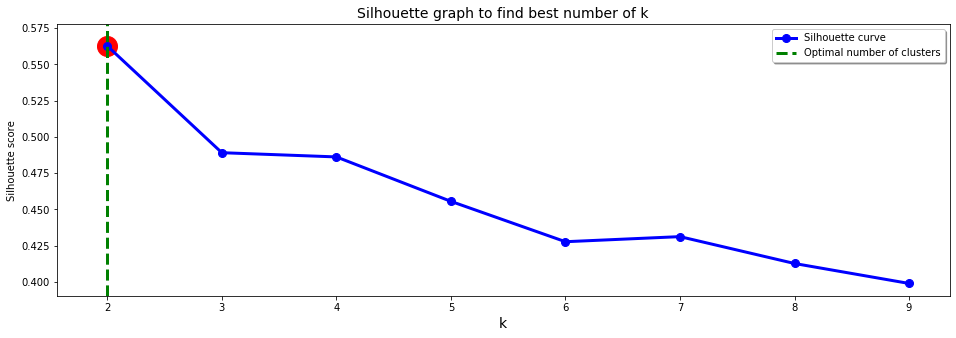

In [202]:
rcParams['figure.figsize'] = 16,5 
plt.plot(range(2,10), silhouette_scores, 'bo-', color = 'blue', linewidth=3, markersize=8, label = 'Silhouette curve') 
plt.xlabel('k', fontsize =14) 
plt.ylabel('Silhouette score') 
plt.title('Silhouette graph to find best number of k', fontsize= 14) 

#calculate optimal number of k 
k = np.argmax(silhouette_scores ) + 2 

#drawing a vartical line for optimal number of k 
plt.axvline(x=k, linestyle = '--', c='green', linewidth = 3, label = 'Optimal number of clusters') 
plt.scatter(k, silhouette_scores[k-2], c='red', s=400) 
plt.legend(shadow=True) 
plt.show()

#### Best number of clusters (K) = 2 

# Challenge 2 

#### 1) Square-root transformation 

#### 2) Yes, I think it's a good idea to transform the data. Firstly, it is hard to visualize our un-transformed data and by transforming our data it is being evenly distributed along the axis and the visualization is better. Secondly, from our un-transformed data, it is difficult to understand the relationship between the dependant and independent variables. Therefore, by transforming our data we can see the relationship between the dependant and independent variable clearly which is as our value of the independent variable increases the value of the dependant variable decreases. Thirdly, by transforming the data we can see the skewness of the graph whether it is left skew or right skew. Lastly, by transforming our data we can fit into Machine Learning model such as ploynomial regression. 